In [1]:
import pandas as pd
import numpy as np
#import scipy.stats
import re, math
#from mpl_toolkits import mplot3d
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import csv
#import matplotlib.ticker as mtick
#import seaborn as sns
import itertools
import aggregate as agg
import copy
import io
#from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
set_matplotlib_formats('png', 'png')

In [2]:
def xsargs(levels, args = None):
    levels = copy.deepcopy(levels)
    if args: levels.update(args)
    return {"key" : [levels.get(key) for key in levels.keys()], "level" : [*levels]}

In [3]:
raw = {"mlbp": pd.read_csv("update_ccmlbp.sum", sep='\t'),
      }

categ = {"mlbp": (lambda x: re.sub(r"^.*/(n\d*)_(m\d*)_(q\d*)__(.*)\.out",r"\3-\2-\1",x)),
        }

nfraw = {"nfmlbp": pd.read_csv("nfccmlbp_results.sum", sep='\t'), 
        }

nfcateg = {"nfmlbp": (lambda x: re.sub(r"^.*/(n\d*)_(m\d*)_(q\d*)__(.*)\.out",r"\3-\2-\1",x)),
        }
for a in raw:
    agg.agg_print(raw[a])
for b in nfraw:
    print('a')
    agg.agg_print(nfraw[b])
    
# for b in nfraw:
#     agg.agg_print(nfraw[b])

0       q025-m01-n0005
1       q025-m01-n0005
2       q025-m01-n0005
3       q025-m01-n0005
4       q025-m01-n0005
             ...      
2195    q100-m05-n0100
2196    q100-m05-n0100
2197    q100-m05-n0100
2198    q100-m05-n0100
2199    q100-m05-n0100
Name: cat, Length: 2200, dtype: object
                runs      obj_mean       obj_sd  ttot_med       babn_mean  status
q025-m01-n0005    10   1330.000000   190.497594       0.0      0.00000000     1.0
q025-m01-n0010    10   2579.400000   167.233835       0.0     10.80000000     1.0
q025-m01-n0015    10   4001.700000   481.086975       0.3    596.90000000     1.0
q025-m01-n0020    10   5046.500000   457.442710       0.2    431.90000000     1.0
q025-m01-n0025    10   6086.500000   785.141353       1.4   1538.00000000     1.0
q025-m01-n0030    10           NaN          NaN       NaN             NaN     0.0
q025-m01-n0035    10   8637.300000   782.265236       7.1   2414.70000000     1.0
q025-m01-n0040    10  10257.888889   814.781634     

                runs      obj_mean        obj_sd  ttot_med       babn_mean  status
q025-m01-n0005    10   1330.000000    190.497594       0.0      0.00000000     1.0
q025-m01-n0010    10   2579.400000    167.233835       0.0     10.80000000     1.0
q025-m01-n0015    10   4001.700000    481.086975       0.3    596.90000000     1.0
q025-m01-n0020    10   5046.500000    457.442710       0.2    431.90000000     1.0
q025-m01-n0025    10   6086.500000    785.141353       1.5   1538.00000000     1.0
q025-m01-n0030    10   7389.666667    298.985507       5.4   2190.00000000     0.3
q025-m01-n0035    10   8577.333333    563.273882       2.4   1281.66666667     0.6
q025-m01-n0040    10  10285.700000    773.201433       8.1   2475.70000000     1.0
q025-m01-n0045    10  11056.400000    981.594530      10.4   4238.40000000     1.0
q025-m01-n0050    10           NaN           NaN       NaN             NaN     0.0
q025-m01-n0100    10  24232.333333    801.973399     546.3  32974.33333333     0.3
q025

In [4]:
ag = {}; tot = {}
headers = ['name ', 'runs', 'obj_mean', 'obj_sd', 'tott_med', 'babn_mean', 'status']
for a in raw:
    ag[a] = agg.aggregate(raw[a], categ[a])
    tot[a] = agg.totalagg(ag[a])
    #ag[a]["ratio"] = ag[a].apply(lambda row: row["sigma"] / row["n"])
    agg.make_index(ag[a]);
    #raw[a] = agg.make_index(raw[a].set_index(["cat"]).sort_index())
  

nfag = {}; nftot = {}
for a in nfraw:
    nfag[a] = agg.aggregate(nfraw[a], nfcateg[a]) 
    nftot[a] = agg.totalagg(nfag[a])
    #ag[a]["ratio"] = ag[a].apply(lambda row: row["sigma"] / row["n"])
    agg.make_index(nfag[a]);
    nfraw[a] = agg.make_index(nfraw[a].set_index(["cat"]).sort_index())
print(tot["mlbp"])
print(nftot["nfmlbp"])
print(nfag["nfmlbp"])

0       q025-m01-n0005
1       q025-m01-n0005
2       q025-m01-n0005
3       q025-m01-n0005
4       q025-m01-n0005
             ...      
2195    q100-m05-n0100
2196    q100-m05-n0100
2197    q100-m05-n0100
2198    q100-m05-n0100
2199    q100-m05-n0100
Name: cat, Length: 2200, dtype: object
0       q025-m01-n0005
1       q025-m01-n0005
2       q025-m01-n0005
3       q025-m01-n0005
4       q025-m01-n0005
             ...      
2195    q100-m05-n0100
2196    q100-m05-n0100
2197    q100-m05-n0100
2198    q100-m05-n0100
2199    q100-m05-n0100
Name: cat, Length: 2200, dtype: object
  runs      obj_mean       obj_sd  ttot_med    babn_mean  status
  2200  16092.484383  1520.615115   9.97574  4283.799934     0.0
  runs      obj_mean       obj_sd  ttot_med    babn_mean  status
  2200  22056.439637  2458.901067   295.809  8367.307623     0.0
           runs  obj_mean       obj_sd    ttot_med  babn_mean  status
q   m n                                                              
25  1 5      10 

In [5]:
cm = plt.get_cmap('tab20')  # color map / tab20 / 20
ncolors = 20                 # number of colors
norm = cl.Normalize(vmin=1, vmax=ncolors)
colors = [cm(norm(x)) for x in range(1,ncolors+1)]

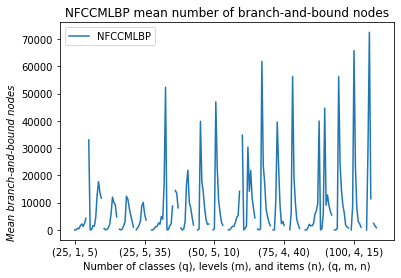

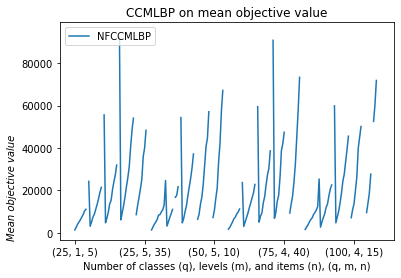

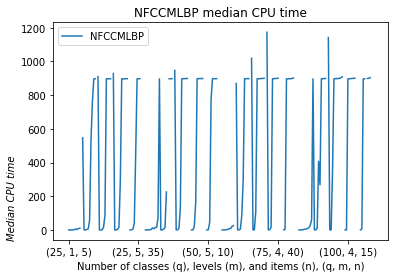

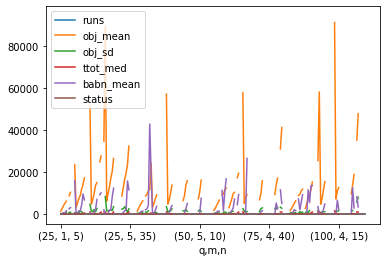

In [8]:

#ag["mlbp"]["babn_mean"].plot(label="CCMLBP")
nfag["nfmlbp"]["babn_mean"].plot(label="NFCCMLBP")
plt.title("NFCCMLBP mean number of branch-and-bound nodes")
plt.xlabel('Number of classes (q), levels (m), and items (n), (q, m, n)')
plt.ylabel('Mean branch-and-bound nodes', style='italic', loc='bottom')
plt.legend()
plt.show()
#ag["mlbp"]["obj_mean"].plot(label="CCMLBP")
nfag["nfmlbp"]["obj_mean"].plot(label="NFCCMLBP")
plt.title("CCMLBP on mean objective value")
plt.xlabel('Number of classes (q), levels (m), and items (n), (q, m, n)')
plt.ylabel('Mean objective value', style='italic', loc='bottom')
plt.legend()
plt.show()
#ag["mlbp"]["ttot_med"].plot(label="CCMLBP")
nfag["nfmlbp"]["ttot_med"].plot(label="NFCCMLBP")
plt.title("NFCCMLBP median CPU time")
plt.xlabel('Number of classes (q), levels (m), and items (n), (q, m, n)')
plt.ylabel('Median CPU time', style='italic', loc='bottom')
plt.legend()
plt.show()
plt.show()
ag["mlbp"].plot()
plt.show()

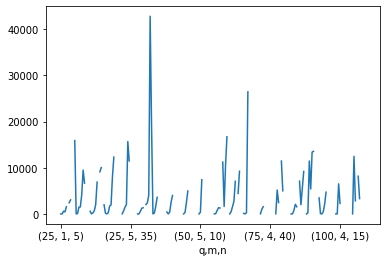

KeyError: 1

In [7]:
opts = {}
opts["n"] = 900
#opts["ndt"] = 10

plot_opts = {"kind":"bar", "legend":False, "rot":0}
line_opts = {"linewidth": 1.5, "color": 'black', "ls": '--', "zorder": 4}

barcolors = [colors[i] for i in [0, 2, 4, 6]]

#ag["mlbp"]["nfeas"] = ag["mlbp"]["runs"] - ag["mlbp"]["nfail"]
#ag["mlbp"]["negfails"] = ag["mlbp"]["nfail"] * -1
#print(ag["mlbp"].index)
cs  = ag["mlbp"].index.unique(level='n')
ms = ag["mlbp"]["babn_mean"].index.unique(level='m')
ns = ag["mlbp"]["babn_mean"].index.unique(level='n')
ns

ag["mlbp"]["babn_mean"].plot()
plt.show()
mlbp_2d = {}
for m in range(len(ms)):
    for n in range(len(ns)):
        name = 'm' + str(ms[m]) + '_n' + str(ns[n])
        mlbp_2d[name] = ag["mlbp"]["babn_mean"][ms[m]][ns[n]]
print(mlbp_2d)

# myList = mlbp_2d.items()
# myList = sorted(myList) 
# x, y = zip(*myList) 
# %matplotlib inline
# plt.plot(x, y)
# plt.show()


# fig, ax = plt.subplots(len(cs), 5, figsize=(30,5*len(cs)));
# for i in range(len(cs)):
#     print(cs[i])
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["obj_mean"].plot(**plot_opts, ax=ax[i][0])
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["db_mean"].plot(**plot_opts, ax=ax[i][0], color=[(1.0, 1.0, 1.0, 0.5)], edgecolor='black')
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["nfeas"].plot(**plot_opts, ax=ax[i][1], color=barcolors)
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["nopt"].plot(**plot_opts, ax=ax[i][1], color=[(1.0, 1.0, 1.0, 0.5)], edgecolor='black')
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["negfails"].plot(**plot_opts, ax=ax[i][1], color=barcolors)
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["gap_mean"].plot(**plot_opts, ax=ax[i][2])
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["babn_mean"].plot(**plot_opts, ax=ax[i][3])
#     pd.concat([ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":0})),
#                ag["mlbp"].xs(**xsargs(opts, {"c":cs[i], "stre":1}))], axis=1)["ttot_mean"].plot(**plot_opts, ax=ax[i][4])
    
#     if i == 0:
#         ax[i][0].legend(["w/o strengthening ineq.", "w/ strengthening ineq."])

#     ax[i][3].set_yscale("symlog")
#     ax[i][4].set_yscale("log")
    
#     ax[i][0].set_title("Primal/Dual Bounds$")
#     ax[i][1].set_title("Number of optimal/feasible/failed instances$")
#     ax[i][2].set_title("Optimality Gap [%]$")
#     ax[i][3].set_title("Number of B&B-Nodes$")
#     ax[i][4].set_title("Computation time [s]")

# plt.tight_layout()

In [ ]:
my_dict = { 'Khan': 4, 'Ali': 2, 'Luna': 6, 'Mark': 11, 'Pooja': 8, 'Sara': 1}

myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 
%matplotlib inline
plt.plot(x, y)
plt.show()
